<a href="https://colab.research.google.com/github/SANGJI-PARK/Codestates-Project1/blob/main/%5BProject1%5DAI_02_%EB%B0%95%EC%83%81%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1**
# **피부의 악성/양성 종양 분류 모델 생성**
### **AI 02 박상지**

#### 본 프로젝트에서는 section4의 프로젝트 기반에 피드백을 반영하여 더 발전된 모델을 만들고자 함.
---

## **Data Description**

* 데이터 
  * 피부 종양의 종류별 피부 촬영 이미지

* 종양의 종류
  * **양성 종양** : 비교적 서서히 성장하며 신체 여러 부위에 **확산, 전이하지 않으며 제거하여 치유시킬 수 있는** 종양을 말합니다.
  * **악성 종양(암)** : 빠른 성장과 침윤성(파고들거나 퍼져나감) 성장 및 체내 각 부위에 확산, 전이(원래 장소에서 떨어진 곳까지 이동함)하여 **생명에 위험을 초래하는 종양**.

<br>

* 데이터 구조 : train, validation, test 데이터가 각각 **9개**의 클래스를 가지고 있음

* 클래스
  * **seborrheic keratosis(지루성 각화증)** : 일명 검버섯, 피부의 **양성** 표피 종양이며 치료를 요하는 질환은 아니다.
  
   <img src='https://drive.google.com/uc?id=16wtpyYRWDhCVWgUDOpanDHqy1RypHLTn' width="200"/>
  * **pigmented benign keratosis(색소 양성 각화증)** : **양성** 표피 종양이다.

   <img src='https://drive.google.com/uc?id=13CE9eTZU-YSdJnsn46Ngub7VtoraF7fq' width="200"/>

  * **vascular lesion(선천성 모반)** : 선천적으로 태어날때부터 혹은 태어나고 발생하는 모반으로, **양성 종양**이다. 크게 혈관종(Hemangiomas), 혈관 기형(Vascular Malformations), 화농성육아종(Pyogenic Granuloma)로 구분된다.

   <img src='https://drive.google.com/uc?id=1jK6qSFVfH0I-J1xDXZXhrHDSBEr-5kTU' width="200"/>
 
 * **dermatofibroma(피부섬유종)** : 섬유성 결합조직으로 구성되는 **양성종양**이다.

   <img src='https://drive.google.com/uc?id=1ItuognqhUQ9AaFxSwseqjcPyu2KrRoUM' width="200"/>
 * **nevus(반점)** : 피부에 나타나는 반점으로, 종류가 다양하며 일부는 피부암의 **전암성** 병터가 되기도 한다. (출처 : 네이버 생명과학대사전)

   <img src='https://drive.google.com/uc?id=1mmU6aT9xwvJsBpEZS0nMSBZ_MaJiUm-5' width="200"/>
 * **actinic keratosis(광선각화증)** : 지속적인 햇빛이나 인공 광원 노출로 피부에 잘 발생하는 전암 질환이다. 오랜 기간이 지난 후 **편평세포암으로 이행할 수 있다.**

   <img src='https://drive.google.com/uc?id=1OLx97VMbgU4HbcfhZLQXua0j7P_qKlgV' width="200"/>
 * **basal cell carcinoma(기저세포암)** : 피부에 발생하는 원발성 **악성종양**이다. 일반적으로 태양 광선에 오랜 기간 노출된 부위에 많이 발생하며, 얼굴 중 특히 눈꺼풀, 코 둘레에 잘 발생한다.

   <img src='https://drive.google.com/uc?id=1cHeGTEmBFDHTZbidY77qIyf7_X4J3Z8e' width="200"/>
 * **melanoma(악성 흑색종)** : 멜라닌 색소를 만들어 내는 멜라닌 세포의 악성화로 생기는 **피부암(악성종양)**이다.

   <img src='https://drive.google.com/uc?id=11xSzRnA5caGZSg9zjvZtVUSOJHzijyJ9' width="200"/>
 * **squamous cell carcinoma(편평상피암)** : 편평상피세포에서 발생하는 **악성 종양**

   <img src='https://drive.google.com/uc?id=1TDYOmxHb39_cPC34rgRRyo3X7q7TjJef' width="200"/>

## **Project Description**
* 모델 목적
  * 육안으로 구분하기 힘든 피부의 양성종양과 악성종양을 구분해냄으로써 빠르고 정확환 치료를 하기 위함이다.
  * 특히 악성종양으로 발전할 수 있는 가능성이 있는 암들은 더욱 구분하기 어려우므로 이러한 경우에 더욱 사용 의의가 있다.

<br>

* 분석 모델 : **CNN(Convolutional Neural Network)**
  * 본 분석에서는 이미지 데이터를 사용하기 때문에 이미지 공간의 유실을 최소화 할 수 있으며 특징 추출 및 학습이 효율적인 CNN 모델 사용
  * 각 레이어의 입출력 데이터 형상을 유지하며 인접 이미지와의 특징을 효과적으로 인식
  * 추출한 이미지의 특징을 모으고 강화하는 Pooling layer
  * 필터 공유로 인하여 일반 인공 신경망보다 학습 파라미터가 적기 때문에 효율적인 분석 진행 가능


* 분석 절차
 1. 데이터 증강 및 전처리
 2. 딥러닝 모델 생성
 3. 파라미터 튜닝
 4. 교차 검증
 5. 결과 시각화 및 해석
 6. 결론
 7. 한계점

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#@title
import numpy as np
import random
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#### **1. 데이터 증강 및 전처리 - ImageDataGenerator 사용**

In [3]:
# Training Data
TRAINING_DIR = "/content/drive/MyDrive/Study/AI Bootcamp/data/[Project1]Skin cancer ISIC The International Skin Imaging Collaboration/Train"
training_datagen = ImageDataGenerator(rescale = 1./255, # 이미지 크기 조정 (정규화)
                                   validation_split = 0.2,  
                                   rotation_range=5, # 0도와 5도 사이의 랜덤한 각도로 회전
                                   width_shift_range=0.2, # 수평으로 랜덤 이동
                                   height_shift_range=0.2, # 수직으로 랜덤 이동
                                   shear_range=0.2, # 시계 반대 방향으로 변형
                                   zoom_range=0.2, # 확대/축소
                                   horizontal_flip=True, # 수평으로 뒤집기
                                   fill_mode='nearest') # 생성되는 빈 공간을 가장 가까운 색으로 채우기

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(224,224),
    class_mode='categorical', # 다중 클래스
    batch_size = 64
)

# Validation Data
VALIDATION_DIR = "/content/drive/MyDrive/Study/AI Bootcamp/data/[Project1]Skin cancer ISIC The International Skin Imaging Collaboration/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size= 64
)

# Test Data
TEST_DIR = "/content/drive/MyDrive/Study/AI Bootcamp/data/[Project1]Skin cancer ISIC The International Skin Imaging Collaboration/Test"
test_datagen  = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size= 64
)

Found 1760 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


#### **2. 모델 생성**

In [22]:
#@title
from tensorflow.keras.optimizers import Adam
model_base = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])
model_base.compile(loss='categorical_crossentropy',
    optimizer= Adam(learning_rate=0.001),
    metrics=['acc'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

history = model_base.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 30,
    batch_size = 32,
    verbose = 1,
    callbacks=EarlyStopping(monitor='val_loss', verbose=1, patience=5)
)

Epoch 1/30
28/28 [==============================] - 49s 2s/step - loss: 3.3538 - acc: 0.2199 - val_loss: 1.8762 - val_acc: 0.3221
Epoch 2/30
28/28 [==============================] - 49s 2s/step - loss: 1.7743 - acc: 0.3386 - val_loss: 2.1178 - val_acc: 0.3153
Epoch 3/30
28/28 [==============================] - 49s 2s/step - loss: 1.5907 - acc: 0.4045 - val_loss: 1.9275 - val_acc: 0.3896
Epoch 4/30
28/28 [==============================] - 48s 2s/step - loss: 1.5760 - acc: 0.4330 - val_loss: 1.7069 - val_acc: 0.4437
Epoch 5/30
28/28 [==============================] - 49s 2s/step - loss: 1.4525 - acc: 0.4835 - val_loss: 1.7157 - val_acc: 0.4662
Epoch 6/30
28/28 [==============================] - 48s 2s/step - loss: 1.4057 - acc: 0.5028 - val_loss: 1.7519 - val_acc: 0.4437
Epoch 7/30
28/28 [==============================] - 47s 2s/step - loss: 1.3383 - acc: 0.5091 - val_loss: 1.8816 - val_acc: 0.4392
Epoch 8/30
28/28 [==============================] - 48s 2s/step - loss: 1.3875 - acc: 0.52

    Validation Accuracy(검증 정확도) : 45.50%

#### **3. 파라미터 튜닝**

#### 하이퍼 파라미터 튜닝 - Kerastuner 라이브러리의 Randomsearch

- 첫번째 Conv2D의 필터 수 : L1_NUM_FILTERS
- 두번째 Conv2D의 필터 수 : L2_NUM_FILTERS
- 세번째 Conv2D의 필터 수 : L3_NUM_FILTERS
- Dense 레이어의 출력뉴런 수 : NUM_DIMS
- 최적화기의 학습률 : LR

In [6]:
#@title
!pip install -U keras-tuner
import kerastuner as kt

In [7]:
#@title
# 튜닝
def model_fn(hp):

    L1_NUM_FILTERS = hp.Int('L1_NUM_FILTERS', min_value = 13, max_value = 64, step = 16)
    L1_NUM_KERNELS =[3,5]
    L2_NUM_FILTERS = hp.Int('L2_NUM_FILTERS', min_value = 16, max_value = 64, step = 16)
    L2_NUM_KERNELS =[3,5]
    L3_NUM_FILTERS = hp.Int('L3_NUM_FILTERS', min_value = 16, max_value = 64, step = 16)
    L3_NUM_KERNELS =[3,5]
    NUM_DIMS = hp.Int('NUM_DIMS', min_value = 32, max_value = 128, step = 32)
    LR = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

    model_tuner = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(L1_NUM_FILTERS, kernel_size=L1_NUM_KERNELS, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(L2_NUM_FILTERS, kernel_size=L2_NUM_KERNELS, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(L3_NUM_FILTERS, kernel_size=L3_NUM_KERNELS, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(NUM_DIMS, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')])

    model_tuner.compile(loss='categorical_crossentropy',
        optimizer= Adam(LR),
        metrics=['acc'])

    return model

In [8]:
#@title
tuner = kt.RandomSearch(model_fn, 
              objective = 'val_acc',
              max_trials = 10,
              overwrite=True)     

In [9]:
tuner.search(train_generator,validation_data=validation_generator,epochs=3)

Trial 10 Complete [00h 02m 33s]
val_acc: 0.37612614035606384

Best val_acc So Far: 0.3941441476345062
Total elapsed time: 00h 27m 56s
INFO:tensorflow:Oracle triggered exit


    파라미터 튜닝 후 Validation Accurate(검증정확도) : 37.61%

    튜닝 후 더 낮아진 정확도를 보였다.
    여러번 시도해보다가 더이상의 튜닝을 진행할 수 없어 처음 만든 모델로 교차검증을 시행했다.

#### **4. 교차검증 : K-fold(5-fold)**

In [26]:
#@title
DATA_DIR = "/content/drive/MyDrive/Study/AI Bootcamp/data/[Project1]Skin cancer ISIC The International Skin Imaging Collaboration"
df_datagen  = ImageDataGenerator(rescale = 1./255)
df_generator = df_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size= 64
)

Found 2322 images belonging to 3 classes.


In [27]:
#@title
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True)

for trian, test in kf.split(df_generator) :
    TRAINING_DIR = "/content/drive/MyDrive/Study/AI Bootcamp/data/[Project1]Skin cancer ISIC The International Skin Imaging Collaboration/Train"
    training_datagen = ImageDataGenerator(rescale = 1./255, # 이미지 크기 조정 (정규화)
                                      validation_split = 0.2,  
                                      rotation_range=5, # 0도와 5도 사이의 랜덤한 각도로 회전
                                      width_shift_range=0.2, # 수평으로 랜덤 이동
                                      height_shift_range=0.2, # 수직으로 랜덤 이동
                                      shear_range=0.2, # 시계 반대 방향으로 변형
                                      zoom_range=0.2, # 확대/축소
                                      horizontal_flip=True, # 수평으로 뒤집기
                                      fill_mode='nearest') # 생성되는 빈 공간을 가장 가까운 색으로 채우기

    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(224,224),
        class_mode='categorical', # 다중 클래스
        batch_size = 64
    )

    # Validation Data
    VALIDATION_DIR = "/content/drive/MyDrive/Study/AI Bootcamp/data/[Project1]Skin cancer ISIC The International Skin Imaging Collaboration/Validation"
    validation_datagen = ImageDataGenerator(rescale = 1./255)

    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(224,224),
        class_mode='categorical',
        batch_size= 64
    )

    # Test Data
    TEST_DIR = "/content/drive/MyDrive/Study/AI Bootcamp/data/[Project1]Skin cancer ISIC The International Skin Imaging Collaboration/Test"
    test_datagen  = ImageDataGenerator(rescale = 1./255)

    test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(224,224),
        class_mode='categorical',
        batch_size= 64
    )

    model_base.compile(loss='categorical_crossentropy',
    optimizer= Adam(learning_rate=0.001),
    metrics=['acc'])

    model_base.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 30,
    batch_size = 32,
    verbose = 1,
    callbacks=EarlyStopping(monitor='val_loss', verbose=1, patience=5)
)

Found 1760 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.
Epoch 1/30
28/28 [==============================] - 50s 2s/step - loss: 1.5553 - acc: 0.4420 - val_loss: 1.8417 - val_acc: 0.4392
Epoch 2/30
28/28 [==============================] - 49s 2s/step - loss: 1.3382 - acc: 0.5205 - val_loss: 1.8610 - val_acc: 0.4685
Epoch 3/30
28/28 [==============================] - 48s 2s/step - loss: 1.2808 - acc: 0.5318 - val_loss: 1.7145 - val_acc: 0.4662
Epoch 4/30
28/28 [==============================] - 50s 2s/step - loss: 1.3121 - acc: 0.5312 - val_loss: 1.7322 - val_acc: 0.5068
Epoch 5/30
28/28 [==============================] - 48s 2s/step - loss: 1.2986 - acc: 0.5273 - val_loss: 1.7851 - val_acc: 0.4279
Epoch 6/30
28/28 [==============================] - 48s 2s/step - loss: 1.2653 - acc: 0.5466 - val_loss: 1.7176 - val_acc: 0.5068
Epoch 7/30
28/28 [==============================] - 49s 2s/step - loss: 1.1946 - acc: 0.5705 - v

In [29]:
model_base.evaluate(test_generator, verbose=1)

2/2 [==============================] - 39s 35s/step - loss: 3.9723 - acc: 0.4576


[3.9723472595214844, 0.4576271176338196]

    테스트 데이터의 예측 정확도 : 45.76%

#### **5. 결과 시각화 및 해석**

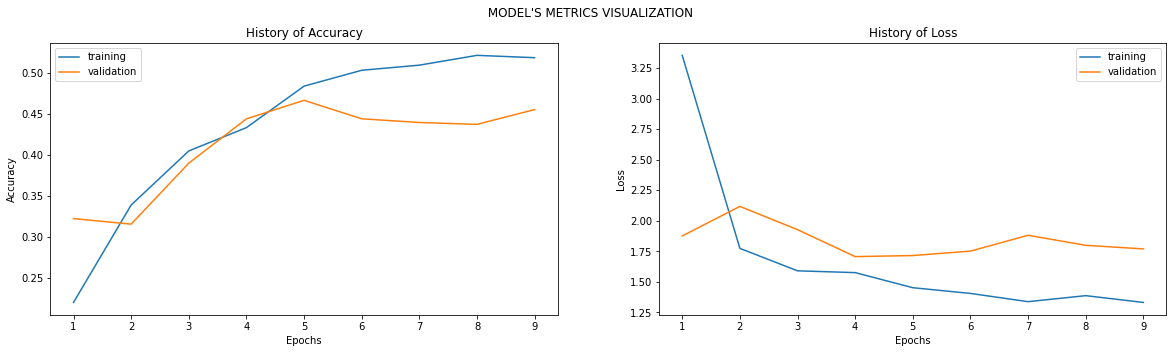

In [31]:
import matplotlib.pyplot as plt

def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    plt.show()
    

Train_Val_Plot(history.history['acc'],history.history['val_acc'],
               history.history['loss'],history.history['val_loss'],
              )

#### **6. 결론**
* 테스트 데이터 정확도가 45.76%인 피부 종양 분류 모델이 생성되었다.

##### **7. 한계점**

* 모델을 CNN 하나로만 사용하였고 다른 모델과 비교해보지 못했다.
* 하이퍼 파라미터 튜닝을 하여 모델의 정확도가 더 낮아졌으며 이 점을 개선하지 못했다.
* 하이퍼 파라미터를 통해서 왜 성능을 높이지 못했는지에 대한 추가 연구가 더 필요하다.
* 종합적으로, 이전 섹션의 프로젝트에서 피드백을 많이 반영하지 못하였고 더 나은 성능의 모델을 만들지 못했습니다.
